In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score



In [2]:
digits = datasets.load_digits()


In [3]:
print("Dataset shape:", digits.images.shape)
print("Number of samples:", len(digits.images))
print("Number of features per sample:", digits.data.shape[1])


Dataset shape: (1797, 8, 8)
Number of samples: 1797
Number of features per sample: 64


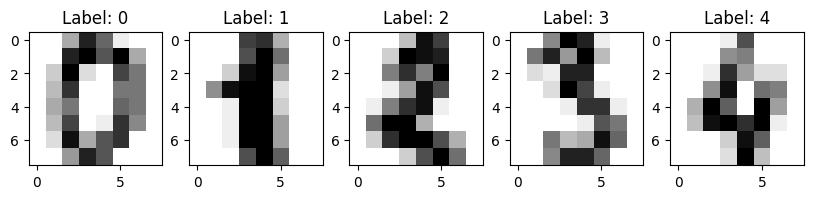

In [4]:
plt.figure(figsize=(10,4))
for index, (image, label) in enumerate(zip(digits.images[:5], digits.target[:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title(f'Label: {label}')
plt.show()


In [5]:
X = digits.data  # Features (flattened images)
y = digits.target  # Labels (digit classes)


In [6]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [8]:
print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)


Training set size: (1437, 64)
Test set size: (360, 64)


In [9]:
svm_model = SVC(kernel='linear', random_state=42)


In [10]:
svm_model.fit(X_train, y_train)


SVC(kernel='linear', random_state=42)

In [11]:
y_pred_train = svm_model.predict(X_train)
y_pred_test = svm_model.predict(X_test)


In [12]:
print("Training accuracy:", accuracy_score(y_train, y_pred_train))
print("Test accuracy:", accuracy_score(y_test, y_pred_test))


Training accuracy: 1.0
Test accuracy: 0.975


In [13]:
print("\nClassification report on test data:")
print(classification_report(y_test, y_pred_test))



Classification report on test data:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        33
           1       0.97      1.00      0.98        28
           2       1.00      1.00      1.00        33
           3       0.94      0.97      0.96        34
           4       1.00      1.00      1.00        46
           5       0.96      0.96      0.96        47
           6       0.97      0.97      0.97        35
           7       0.97      0.97      0.97        34
           8       1.00      0.93      0.97        30
           9       0.97      0.95      0.96        40

    accuracy                           0.97       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.97      0.97       360



<function matplotlib.pyplot.show(close=None, block=None)>

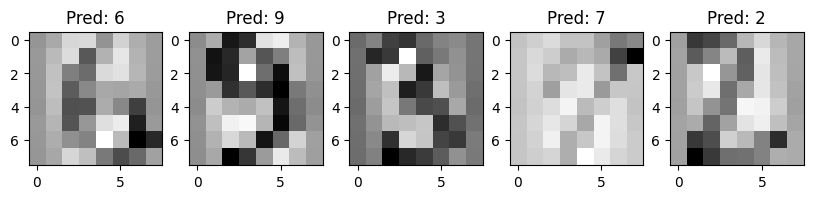

In [14]:
plt.figure(figsize=(10,4))
for index, (image, prediction) in enumerate(zip(X_test[:5], y_pred_test[:5])):
    plt.subplot(1, 5, index+1)
    plt.imshow(image.reshape(8,8), cmap=plt.cm.gray_r, interpolation= 'nearest')
    plt.title(f'Pred: {prediction}')
plt.show

Enter an index from the dataset (0 to359):6
Predicted digit:  5


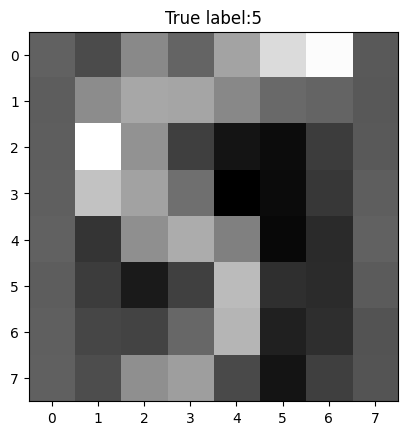

In [15]:
#Allowing user input for an index
index = int(input("Enter an index from the dataset (0 to{}):".format(len(X_test)-1)))
image = X_test[index].reshape(8,8)
plt.imshow(image, cmap='gray')
plt.title(f"True label:{y_test[index]}")
plt.show

#Predicted digit
predicted_digit = svm_model.predict([X_test[index]])
print("Predicted digit: ", predicted_digit[0])